In [1]:
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

In [2]:
n_steps = 10

In [3]:
# build a univariate sequence
def build_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):        
        end_index = i + n_steps
        # check if end index is over sequence
        if end_index + 1 > len(sequence):
            break
        # get input and output
        seq_x, seq_y = sequence[i:end_index], sequence[end_index]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [4]:
df = pd.read_csv("dataset_GBPUSD_EURUSD.csv")
spread = list(df["SPREAD"])

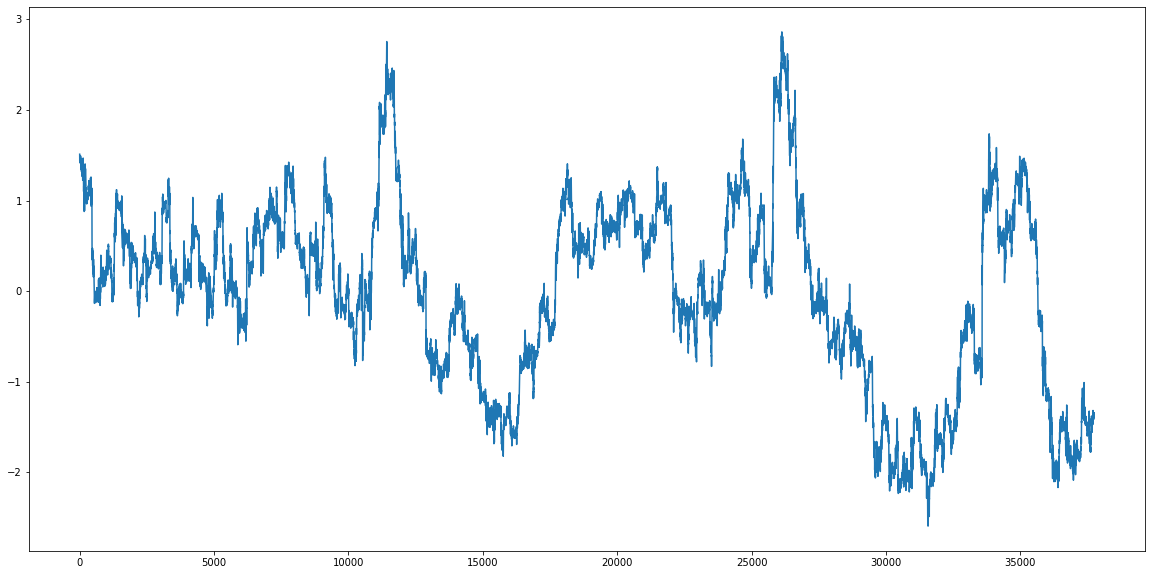

In [5]:
plt.figure(figsize=(20,10))
plt.plot(spread)
plt.show()

In [6]:
X, y = build_sequence(spread, n_steps)

In [7]:
print(X[0:10], y[0:10])
print(len(X))

[[1.51099908 1.46339921 1.43912747 1.44045773 1.46641661 1.49899704
  1.49497653 1.42854491 1.4393654  1.41621572]
 [1.46339921 1.43912747 1.44045773 1.46641661 1.49899704 1.49497653
  1.42854491 1.4393654  1.41621572 1.41630495]
 [1.43912747 1.44045773 1.46641661 1.49899704 1.49497653 1.42854491
  1.4393654  1.41621572 1.41630495 1.45967612]
 [1.44045773 1.46641661 1.49899704 1.49497653 1.42854491 1.4393654
  1.41621572 1.41630495 1.45967612 1.44155005]
 [1.46641661 1.49899704 1.49497653 1.42854491 1.4393654  1.41621572
  1.41630495 1.45967612 1.44155005 1.4252301 ]
 [1.49899704 1.49497653 1.42854491 1.4393654  1.41621572 1.41630495
  1.45967612 1.44155005 1.4252301  1.41976038]
 [1.49497653 1.42854491 1.4393654  1.41621572 1.41630495 1.45967612
  1.44155005 1.4252301  1.41976038 1.43625877]
 [1.42854491 1.4393654  1.41621572 1.41630495 1.45967612 1.44155005
  1.4252301  1.41976038 1.43625877 1.43220853]
 [1.4393654  1.41621572 1.41630495 1.45967612 1.44155005 1.4252301
  1.41976038 1

In [8]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [18]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True), input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(32, activation='relu')))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirectio  (None, 10, 64)           8704      
 nal)                                                            
                                                                 
 bidirectional_4 (Bidirectio  (None, 10, 128)          66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
________________________________________________

In [20]:
# fit model
history = model.fit(X, y, epochs=10)

Epoch 1/10
1180/1180 [==============================] - 35s 24ms/step - loss: 0.0150
Epoch 2/10
1180/1180 [==============================] - 28s 23ms/step - loss: 0.0026
Epoch 3/10
1180/1180 [==============================] - 35s 29ms/step - loss: 0.0022
Epoch 4/10
1180/1180 [==============================] - 39s 33ms/step - loss: 0.0020
Epoch 5/10
1180/1180 [==============================] - 35s 29ms/step - loss: 0.0019 0s - loss:
Epoch 6/10
1180/1180 [==============================] - 37s 32ms/step - loss: 0.0019TA: 0s -
Epoch 7/10
1180/1180 [==============================] - 36s 31ms/step - loss: 0.0018
Epoch 8/10
1180/1180 [==============================] - 33s 28ms/step - loss: 0.0018
Epoch 9/10
1180/1180 [==============================] - 33s 28ms/step - loss: 0.0017
Epoch 10/10
1180/1180 [==============================] - 33s 28ms/step - loss: 0.0017


In [21]:
model.save("LSTM.h5")

In [22]:
model =load_model("LSTM.h5")

In [24]:
prediction_steps = 10
# demonstrate prediction
predictions = []

x_input = X[-1:]
x_input = np.delete(x_input, 0)    
x_input = np.append(x_input, spread[-1])
x_input = x_input.reshape((1, n_steps, n_features))
print(x_input)

for i in range(prediction_steps):    
    yhat = model.predict(x_input)
    print(yhat)
    predictions.append(yhat[0][0])
    x_input = np.delete(x_input, 0)    
    x_input = np.append(x_input, yhat)
    print(x_input)
    x_input = x_input.reshape((1, n_steps, n_features))
print(predictions)

[[[-1.39491042]
  [-1.36407663]
  [-1.36407663]
  [-1.3774684 ]
  [-1.3842089 ]
  [-1.37347764]
  [-1.35884483]
  [-1.34711046]
  [-1.35943965]
  [-1.35810939]]]
[[-1.3592535]]
[-1.36407663 -1.36407663 -1.3774684  -1.3842089  -1.37347764 -1.35884483
 -1.34711046 -1.35943965 -1.35810939 -1.35925353]
[[-1.3597925]]
[-1.36407663 -1.3774684  -1.3842089  -1.37347764 -1.35884483 -1.34711046
 -1.35943965 -1.35810939 -1.35925353 -1.35979247]
[[-1.360135]]
[-1.3774684  -1.3842089  -1.37347764 -1.35884483 -1.34711046 -1.35943965
 -1.35810939 -1.35925353 -1.35979247 -1.36013496]
[[-1.3602315]]
[-1.3842089  -1.37347764 -1.35884483 -1.34711046 -1.35943965 -1.35810939
 -1.35925353 -1.35979247 -1.36013496 -1.36023152]
[[-1.3601447]]
[-1.37347764 -1.35884483 -1.34711046 -1.35943965 -1.35810939 -1.35925353
 -1.35979247 -1.36013496 -1.36023152 -1.36014473]
[[-1.359981]]
[-1.35884483 -1.34711046 -1.35943965 -1.35810939 -1.35925353 -1.35979247
 -1.36013496 -1.36023152 -1.36014473 -1.35998094]
[[-1.3598583

In [25]:
merged_series = spread + predictions

In [26]:
print(len(merged_series))

37759


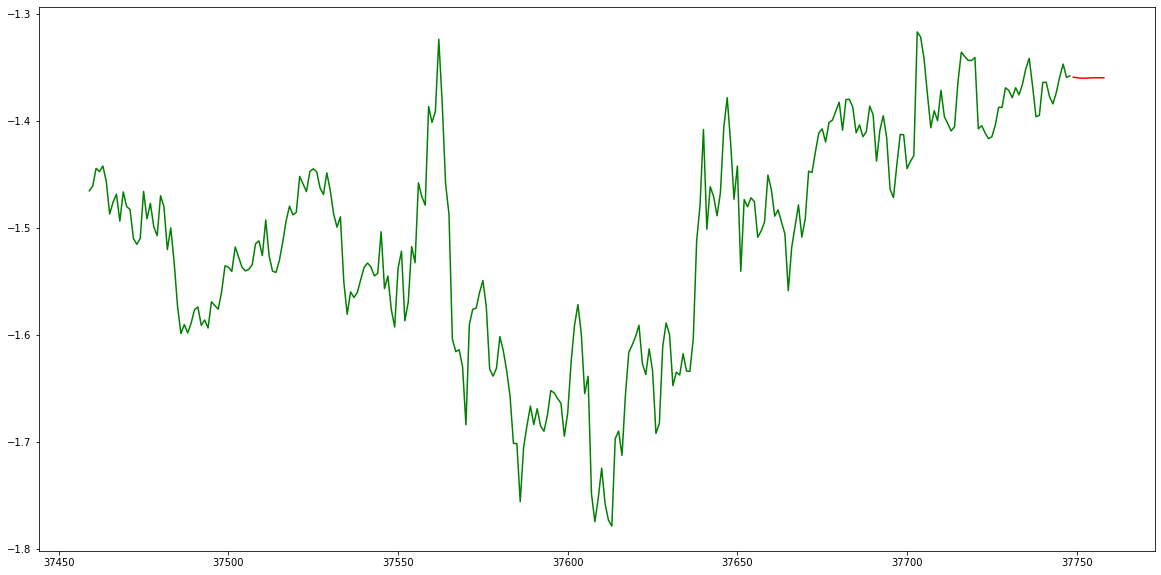

In [27]:
plt.figure(figsize=(20,10))
df = pd.Series(merged_series) 
ax = df[len(merged_series) - 300:len(merged_series) - prediction_steps].plot(color='g')
df[len(merged_series) - prediction_steps:].plot(ax=ax, color='r')
plt.show()